# Pre stuff
Importing libraries, loading and visualising data.

In [13]:
import mne

from mne.decoding import Vectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [14]:
# Folder & files containing the data:
data_path = 'data/'
data_file = '817_1_PDDys_ODDBALL_Clean_curated'

filename = data_path + data_file

# We read the EEG epochs:
epochs = mne.read_epochs(filename + '.fif')

This filename (data/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading data/817_1_PDDys_ODDBALL_Clean_curated.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
189 matching events found
No baseline correction applied
Not setting metadata


<ipython-input-14-1ca795fdfcdb>:8: RuntimeWarning: This filename (data/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(filename + '.fif')


0 projection items activated


In [15]:
epochs.info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FC5, FC1, C3, T7, CP5, ...
    chs : list | 60 items (EEG: 60)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 60 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_id : dict | 4 items
    nchan : int | 60
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneTyp

In [16]:
# The data can be accessed via:
epochs._data

array([[[ 3.52394723e-06,  2.06192612e-06,  4.46908902e-06, ...,
          2.96665620e-06,  2.16401624e-06,  1.87072610e-06],
        [ 4.50709437e-06,  4.35066937e-06,  6.42107294e-06, ...,
          3.37508463e-06,  3.61751079e-06,  7.65960632e-07],
        [-1.29490099e-05,  1.14769172e-06,  7.53064344e-06, ...,
          9.18080709e-06,  9.31064699e-06,  7.09726427e-06],
        ...,
        [ 4.06841724e-07,  2.90893554e-06,  4.71284770e-06, ...,
          9.70285413e-06,  6.65089987e-06,  5.53862809e-06],
        [-3.15314721e-06, -3.34791898e-06,  2.23534035e-06, ...,
          6.38878630e-06,  3.25191187e-06, -5.72537182e-07],
        [ 5.18393038e-06,  3.53263568e-06,  3.91299509e-06, ...,
         -8.49513529e-06, -8.71153162e-06, -9.73261926e-06]],

       [[ 1.03230610e-05,  6.71308611e-06,  4.06666993e-06, ...,
          1.60698795e-05,  9.03341291e-06,  8.83130644e-06],
        [ 1.22205867e-05,  1.32242498e-05,  1.39072570e-05, ...,
          2.48241805e-06,  8.66339622e

In [17]:
epochs.plot

<bound method BaseEpochs.plot of <EpochsFIF  |   189 events (all good), -0.1 - 0.5 sec, baseline off, ~26.2 MB, data loaded,
 'Novel': 30
 'Standard': 130
 'Target': 29>>

In [18]:
# set number of filter parameters
num_filter = 3

In [73]:
# save original data multiple times to apply different filters to it without altering the original data
from copy import deepcopy
import copy
multi_epochs = []
for i in range(num_filter):
    multi_epochs.append(copy.deepcopy(epochs))
print(len(multi_epochs))

3


In [56]:
events = epochs.events
print('Events = ')
print(events)

Events = 
[[  1001      0    201]
 [  2680      0    201]
 [  4019      0    201]
 [  6379      0    201]
 [  8291      0    201]
 [ 10297      0    200]
 [ 12592      0    201]
 [ 14380      0    201]
 [ 16383      0    201]
 [ 18261      0    201]
 [ 20287      0    200]
 [ 22321      0    201]
 [ 24411      0    201]
 [ 26467      0    200]
 [ 28488      0    201]
 [ 30443      0    201]
 [ 32442      0    201]
 [ 34420      0    200]
 [ 36299      0    201]
 [ 38318      0    201]
 [ 40502      0    201]
 [ 44480      0    201]
 [ 46321      0    201]
 [ 50342      0    201]
 [ 52490      0    201]
 [ 56344      0    201]
 [ 58291      0    201]
 [ 60400      0    200]
 [ 62414      0    201]
 [ 64419      0    201]
 [ 68433      0    201]
 [ 72295      0    201]
 [ 74403      0    201]
 [ 76308      0    201]
 [ 78312      0    200]
 [ 80345      0    201]
 [ 82478      0    201]
 [ 86437      0    201]
 [ 88335      0    200]
 [ 90332      0    201]
 [ 92268      0    201]
 [ 964

In [57]:
epochs.event_id

{'Standard': 201, 'Target': 200, 'Novel': 202}

# Preprocessing

## Analysing the data (Max)

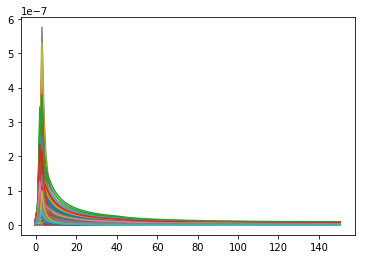

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-58-6aa1e2e35d5b>:16: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  myEpochs.average().plot();


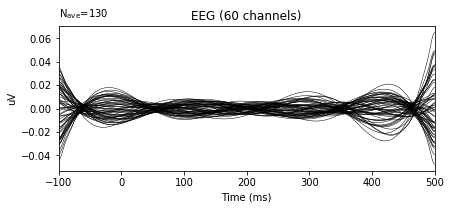

Setting up band-pass filter from 0.1 - 60 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-58-6aa1e2e35d5b>:17: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  myEpochs.filter(l_freq = 0.1, h_freq = 60)


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-58-6aa1e2e35d5b>:18: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  myEpochs.average().plot();


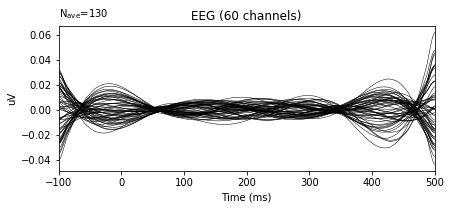

In [58]:
# filter the epoched data:
import numpy as np
%matplotlib inline
myEpochs = epochs['Standard']
from scipy.fftpack import fft
N = len(myEpochs._data[0,0,:])
T = 1.0 / N
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
for jj in myEpochs._data:
    for ii in jj:
        plt.plot(xf, 2.0/N * np.abs(fft(ii)[0:N//2]))
plt.grid
plt.show()

myEpochs.average().plot();
myEpochs.filter(l_freq = 0.1, h_freq = 60)
myEpochs.average().plot();

## Filtering the data (Julie and Georgi)

In [74]:
l_freqs = [0.1, 0.2, 5]
h_freqs = [60, 2, 60]

for i, epoch_i in enumerate(multi_epochs):
    multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])

Setting up band-pass filter from 0.1 - 60 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-74-da524a78aaf9>:5: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


Setting up band-pass filter from 0.2 - 2 Hz
l_trans_bandwidth chosen to be 0.2 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 8251 samples (16.502 sec) selected
filter_length (8251) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-74-da524a78aaf9>:5: RuntimeWarning: filter_length (8251) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


Setting up band-pass filter from 5 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 825 samples (1.650 sec) selected
filter_length (825) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-74-da524a78aaf9>:5: RuntimeWarning: filter_length (825) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  multi_epochs[i].filter(l_freq = l_freqs[i], h_freq = h_freqs[i])


# Applying Machine Learning

In [78]:
# get the data
all_data = [] # create empty list
for i, epochs_i in enumerate(multi_epochs):
    all_data.append(multi_epochs[i]._data) # append new data object to list

# get the labels
labels = epochs.events[:,-1]

if (all_data[0].all==epochs._data.all) or (all_data[0].all==all_data[1].all):
    print('Shit!')
print('Length of data:')
print(len(all_data))
#print('Data:')
#print(all_data)
print('Length of labels:')
print(len(labels))

Length of data:
3
Length of labels:
189


In [79]:
# create pipeline to execute multiple steps in a row
clf = [make_pipeline(Vectorizer(), StandardScaler(), 
                     svm.SVC(kernel='linear',C=1))] * num_filter

In [80]:
for i, data in enumerate(all_data):
    data_train, data_test, labels_train, labels_test = train_test_split(data, # x values
                                                                        labels, # y values
                                                                        test_size=0.4, 
                                                                        random_state=0)
    print('Step', i+1, '/', num_filter)
    clf[i].fit(data_train, labels_train) # apply pipelined steps
    print('Score:', clf[i].score(data_test, labels_test))

Step 1 / 3
Score: 0.5
Step 2 / 3
Score: 0.5131578947368421
Step 3 / 3
Score: 0.5
